
<center><font size='6px' color='#7A33FF'><b>Data Mining Project</b></font><p></p>
<p></p><p></p><center><font size='6px' color='#7A33FF'><b>Topic: Classification of Tweets</b></font>
</center>
<br />
<br />
<br />
<h3 align="right"><font size='4px' color='#3383FF'><b>Samar Khlifi </b></font>
<br />
<br />
<font size='3px' color='#3383FF'><b>3 DNI Groupe 2</b></font>
<br />
<br />


 

<font size='6px' color='#8B2B1C'><b>1. Extracting twitter data</b></font>

<font size='4px' color='#857D3D'><b>1.1.Importing our libraries</b></font>

In [1]:
#!pip install tweepy

In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


import nltk 
import string
import re  # for regular expressions 
import datetime
import csv
%matplotlib inline

C:\Users\Samar_khlifi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<font size='4px' color='#857D3D'><b>1.2. Creating a Twitter App</b></font>

<font  ><b>To extract tweets for a posterior analysis, we need to access to our Twitter account and create an app.  </b></font> 
<p></p> <h6 ><b>From this app that we're creating we will copy the following information: </b></h6> 
   <p></p> <font size='2px' ><b> *Consumer Key (API Key) </b></font> 
   <p></p> <font size='2px' ><b> *Consumer Secret (API Secret) </b></font> 
    <p></p> <font size='2px' ><b>*Access Token </b></font> 
    <p></p> <font size='2px' > <b>*Access Token Secret </b></font> 

In [3]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = 'IUDdqcWgJTYrBIBT6yrJI5ibU'
CONSUMER_SECRET = 'LyEE0h8PjO0yrJm0aEV4T1sYzPv5mTxiw7OLKextestBRvVZuS'

# Access:
ACCESS_TOKEN  = '1331269761720868864-6yhPRXYeq4gFMTAPQVDW9E6JPA2zDN'
ACCESS_SECRET = 'xrULzlC6MT804JWnuwIof3Gtvi2Y6FLn49kPvk3r4QKjN'

<font  ><b>We are now able to consume Twitter's API.</b></font> 
 <p></p><font  ><b>In order to do this, we will create a function to allow us our keys authentication.</b></font> 

In [4]:
# We import our access keys:
# This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api



<font size='4px' color='#857D3D'><b>1.3.  Tweets extraction</b></font>

<font  ><b>Now that we've created a function to setup the Twitter API, we can use this function to create an "extractor" object</b></font> 
<p></p><font  ><b>The way to extract Twitter's data is as follows:</b></font> 

In [ ]:
extractor = twitter_setup()


filename = 'data12' +(datetime.datetime.now().strftime("%Y-%m-%d-%H"))+'.csv'
with open (filename, 'w', newline='',encoding="utf-8") as csvFile:
    csvWriter = csv.writer(csvFile)
    csvWriter.writerow(['date', 'TweetId','Tweet','created_at','geo','place','coordinates','location'])
    #using tweepy Cursor
    for tweet in tweepy.Cursor(extractor.search, q='COVID-19', lang = 'en', count=1000).items():
    #writing a csv file
        tweets_encoded = tweet.text.encode('utf-8')
        tweets_decoded = tweets_encoded.decode('utf-8')
        csvWriter.writerow([datetime.datetime.now().strftime("%Y-%m-%d  %H:%M"), tweet.id, tweets_decoded, tweet.created_at, tweet.geo, tweet.place.name if tweet.place else None, tweet.coordinates, tweet._json["user"]["location"]])




<font  ><b>Now,we have an extracted data, which is listed in  CSV files. I must mention at this point that each element in each file is a tweet object from Tweepy.</b></font>
<p></p><font  ><b> Now we will concatenate the CSV files to each others and store them in CSV file named: "data_tweet.csv"</b></font>

In [ ]:
import os
import glob
import pandas as pd
os.chdir('data_tweets')
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "data_tweet.csv", index=False, encoding='utf-8-sig')

<font size='4px' color='#857D3D'><b>1.4. Create a DataFrame </b></font>

<font  ><b>We now have initial information to construct a pandas DataFrame.</b></font>

In [2]:
data=pd.read_csv("data_tweet.csv") 
data.shape

(16579, 8)

<font  ><b>visualization of the first 10 elements of the dataframe.</b></font>

In [3]:
display(data.head(10))

,date,TweetId,Tweet,created_at,geo,place,coordinates,location
0,2020-12-13 00:28,1337901890483482624,"""Charley Pride, country music star, dies from ...",2020-12-12 23:27:22,NaN,NaN,NaN,Chile
1,2020-12-13 00:28,1337901890202464263,"RT @AP: BREAKING: Charley Pride, the son of sh...",2020-12-12 23:27:22,NaN,NaN,NaN,NaN
2,2020-12-13 00:28,1337901889233375234,My mom introduced me to this Mississippi legen...,2020-12-12 23:27:22,NaN,NaN,NaN,"Cookeville, TN"
3,2020-12-13 00:28,1337901889225191426,RT @KaylayShorter: You ever notice how some pe...,2020-12-12 23:27:22,NaN,NaN,NaN,NaN
4,2020-12-13 00:28,1337901888830906368,"@CashmerTouch No way , none of my business i'm...",2020-12-12 23:27:21,NaN,NaN,NaN,WORLDWIDE
5,2020-12-13 00:28,1337901888541483008,"RT @SABRbbcards: RIP, country music superstar ...",2020-12-12 23:27:21,NaN,NaN,NaN,"Bellevue, WA"
6,2020-12-13 00:28,1337901887450980358,🎬NEW VID\n\nBrooklyn's rapper @YoungMAMusic ha...,2020-12-12 23:27:21,NaN,NaN,NaN,where music takes us 🎵
7,2020-12-13 00:28,1337901887249469441,RT @stfuclitoris: we could sit in the car list...,2020-12-12 23:27:21,NaN,NaN,NaN,NELLAS
8,2020-12-13 00:28,1337901887006396416,RT @cobiMB: Got Bored: https://t.co/Ddww4ZCqLn...,2020-12-12 23:27:21,NaN,NaN,NaN,"Louisville, KY"
9,2020-12-13 00:28,1337901886834434050,cant find music that fits how i’m feeling rn😑,2020-12-12 23:27:21,NaN,NaN,NaN,swag


In [4]:
df1 = pd.DataFrame(data[[ 'Tweet']])
display(df1.head(10))

,Tweet
0,"""Charley Pride, country music star, dies from ..."
1,"RT @AP: BREAKING: Charley Pride, the son of sh..."
2,My mom introduced me to this Mississippi legen...
3,RT @KaylayShorter: You ever notice how some pe...
4,"@CashmerTouch No way , none of my business i'm..."
5,"RT @SABRbbcards: RIP, country music superstar ..."
6,🎬NEW VID\n\nBrooklyn's rapper @YoungMAMusic ha...
7,RT @stfuclitoris: we could sit in the car list...
8,RT @cobiMB: Got Bored: https://t.co/Ddww4ZCqLn...
9,cant find music that fits how i’m feeling rn😑


<font  ><b>Drop any duplicate data</b></font>

In [5]:
NewTweets =df1.drop_duplicates() 
NewTweets.to_csv('NewTweets.csv')

In [6]:
data1=pd.read_csv("NewTweets.csv") 
data1.shape

(10767, 2)

In [7]:
df  = pd.DataFrame(data1[[ 'Tweet']])
display(df.head(10))

,Tweet
0,"""Charley Pride, country music star, dies from ..."
1,"RT @AP: BREAKING: Charley Pride, the son of sh..."
2,My mom introduced me to this Mississippi legen...
3,RT @KaylayShorter: You ever notice how some pe...
4,"@CashmerTouch No way , none of my business i'm..."
5,"RT @SABRbbcards: RIP, country music superstar ..."
6,🎬NEW VID\n\nBrooklyn's rapper @YoungMAMusic ha...
7,RT @stfuclitoris: we could sit in the car list...
8,RT @cobiMB: Got Bored: https://t.co/Ddww4ZCqLn...
9,cant find music that fits how i’m feeling rn😑


<font size='6px' color='#8B2B1C'><b>2. Cleaning Tweets with NLTK</b></font>

<font size='4px' color='#857D3D'><b>2.1. Remove punctuations </b></font> 

In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def remove_punct(text):
    text = re.sub('@[\w]*','',text)#pick any word starting with ‘@’.
    text  = "".join([char for char in text if char not in string.punctuation]) # remove punctuation
    text = re.sub('[0-9]+', '', text)
    text = re.sub(r'#', '', text)# remove hashtags # only removing the hash # sign from the word
    text = re.sub(r'\$\w*', '', text)# remove stock market tickers like $GE
    text = re.sub(r'http\S+', '', text)  # remove hyperlinks
    text = re.sub(r'^RT[\s]+', '', text)  # remove old style retweet text "RT"
    text = ' '.join([w for w in text.split() if len(w) > 3]) #remove all the words having length 3 or less.

    
    return text


df['Tweet_punc']= df['Tweet'].apply(lambda x: remove_punct(x))
df.head(30)


,Tweet,Tweet_punc
0,"""Charley Pride, country music star, dies from ...",Charley Pride country music star dies from com...
1,"RT @AP: BREAKING: Charley Pride, the son of sh...",BREAKING Charley Pride sharecroppers Mississip...
2,My mom introduced me to this Mississippi legen...,introduced this Mississippi legend’s music you...
3,RT @KaylayShorter: You ever notice how some pe...,ever notice some people won’t allow themselves...
4,"@CashmerTouch No way , none of my business i'm...",none business usually busy with friends Music ...
5,"RT @SABRbbcards: RIP, country music superstar ...",country music superstar ballplayer Charley Pri...
6,🎬NEW VID\n\nBrooklyn's rapper @YoungMAMusic ha...,🎬NEW Brooklyns rapper returned with music vide...
7,RT @stfuclitoris: we could sit in the car list...,could listening music talk hours i’ll happy
8,RT @cobiMB: Got Bored: https://t.co/Ddww4ZCqLn...,Bored
9,cant find music that fits how i’m feeling rn😑,cant find music that fits feeling


<font size='4px' color='#857D3D'><b>2.2. Remove emoticons </b></font> 

In [13]:
import emoji

def remove_emoticons(text):
    
    text = emoji.demojize(text)
    text = text.replace(":"," ")
    text = ' '.join(text.split())

    return text

df['Tweet_No-emogis']= df['Tweet_punc'].apply(lambda x: remove_emoticons(x))
df.head(30)


,Tweet,Tweet_punc,Tweet_No-emogis
0,"""Charley Pride, country music star, dies from ...",Charley Pride country music star dies from com...,Charley Pride country music star dies from com...
1,"RT @AP: BREAKING: Charley Pride, the son of sh...",BREAKING Charley Pride sharecroppers Mississip...,BREAKING Charley Pride sharecroppers Mississip...
2,My mom introduced me to this Mississippi legen...,introduced this Mississippi legend’s music you...,introduced this Mississippi legend’s music you...
3,RT @KaylayShorter: You ever notice how some pe...,ever notice some people won’t allow themselves...,ever notice some people won’t allow themselves...
4,"@CashmerTouch No way , none of my business i'm...",none business usually busy with friends Music ...,none business usually busy with friends Music ...
5,"RT @SABRbbcards: RIP, country music superstar ...",country music superstar ballplayer Charley Pri...,country music superstar ballplayer Charley Pri...
6,🎬NEW VID\n\nBrooklyn's rapper @YoungMAMusic ha...,🎬NEW Brooklyns rapper returned with music vide...,clapper_board NEW Brooklyns rapper returned wi...
7,RT @stfuclitoris: we could sit in the car list...,could listening music talk hours i’ll happy,could listening music talk hours i’ll happy
8,RT @cobiMB: Got Bored: https://t.co/Ddww4ZCqLn...,Bored,Bored
9,cant find music that fits how i’m feeling rn😑,cant find music that fits feeling,cant find music that fits feeling


<font size='4px' color='#857D3D'><b>2.3. Tokenization </b></font>  


<font  ><b>Tokenization may be defined as the Process of breaking the given text, into smaller units called tokens. Words, numbers or punctuation marks can be tokens. It may also be called word segmentation.</b></font>

we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [11]:
from nltk.tokenize import TweetTokenizer


In [12]:
# tokenize tweets
def tokenization(text):
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    text = tokenizer.tokenize(text)
    text = [word for word in text if word.isalpha()]
    return text
df['Tweet_token'] = df['Tweet_No-emogis'].apply(lambda x: tokenization(x.lower()))
df.head(10)

,Tweet,Tweet_punc,Tweet_No-emogis,Tweet_token
0,"""Charley Pride, country music star, dies from ...",Charley Pride country music star dies from com...,Charley Pride country music star dies from com...,"[charley, pride, country, music, star, dies, f..."
1,"RT @AP: BREAKING: Charley Pride, the son of sh...",BREAKING Charley Pride sharecroppers Mississip...,BREAKING Charley Pride sharecroppers Mississip...,"[breaking, charley, pride, sharecroppers, miss..."
2,My mom introduced me to this Mississippi legen...,introduced this Mississippi legend’s music you...,introduced this Mississippi legend’s music you...,"[introduced, this, mississippi, legend, s, mus..."
3,RT @KaylayShorter: You ever notice how some pe...,ever notice some people won’t allow themselves...,ever notice some people won’t allow themselves...,"[ever, notice, some, people, won, t, allow, th..."
4,"@CashmerTouch No way , none of my business i'm...",none business usually busy with friends Music ...,none business usually busy with friends Music ...,"[none, business, usually, busy, with, friends,..."
5,"RT @SABRbbcards: RIP, country music superstar ...",country music superstar ballplayer Charley Pri...,country music superstar ballplayer Charley Pri...,"[country, music, superstar, ballplayer, charle..."
6,🎬NEW VID\n\nBrooklyn's rapper @YoungMAMusic ha...,🎬NEW Brooklyns rapper returned with music vide...,clapper_board NEW Brooklyns rapper returned wi...,"[new, brooklyns, rapper, returned, with, music..."
7,RT @stfuclitoris: we could sit in the car list...,could listening music talk hours i’ll happy,could listening music talk hours i’ll happy,"[could, listening, music, talk, hours, i, ll, ..."
8,RT @cobiMB: Got Bored: https://t.co/Ddww4ZCqLn...,Bored,Bored,[bored]
9,cant find music that fits how i’m feeling rn😑,cant find music that fits feeling,cant find music that fits feeling,"[cant, find, music, that, fits, feeling]"


<font size='4px' color='#857D3D'><b>2.4.  Remove stopwords </b></font> 

In [14]:
from nltk.corpus import stopwords 
nltk.download('stopwords')
english_stopwords  = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samar_khlifi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
def remove_stopwords(text):
    text = [word for word in text if word not in english_stopwords ]
   
    return text
    
df['Tweet_stopwords'] = df['Tweet_token'].apply(lambda x: remove_stopwords(x))
df.head(10)


,Tweet,Tweet_punc,Tweet_No-emogis,Tweet_token,Tweet_stopwords
0,"""Charley Pride, country music star, dies from ...",Charley Pride country music star dies from com...,Charley Pride country music star dies from com...,"[charley, pride, country, music, star, dies, f...","[charley, pride, country, music, star, dies, c..."
1,"RT @AP: BREAKING: Charley Pride, the son of sh...",BREAKING Charley Pride sharecroppers Mississip...,BREAKING Charley Pride sharecroppers Mississip...,"[breaking, charley, pride, sharecroppers, miss...","[breaking, charley, pride, sharecroppers, miss..."
2,My mom introduced me to this Mississippi legen...,introduced this Mississippi legend’s music you...,introduced this Mississippi legend’s music you...,"[introduced, this, mississippi, legend, s, mus...","[introduced, mississippi, legend, music, young..."
3,RT @KaylayShorter: You ever notice how some pe...,ever notice some people won’t allow themselves...,ever notice some people won’t allow themselves...,"[ever, notice, some, people, won, t, allow, th...","[ever, notice, people, allow, enjoy, things, f..."
4,"@CashmerTouch No way , none of my business i'm...",none business usually busy with friends Music ...,none business usually busy with friends Music ...,"[none, business, usually, busy, with, friends,...","[none, business, usually, busy, friends, music..."
5,"RT @SABRbbcards: RIP, country music superstar ...",country music superstar ballplayer Charley Pri...,country music superstar ballplayer Charley Pri...,"[country, music, superstar, ballplayer, charle...","[country, music, superstar, ballplayer, charle..."
6,🎬NEW VID\n\nBrooklyn's rapper @YoungMAMusic ha...,🎬NEW Brooklyns rapper returned with music vide...,clapper_board NEW Brooklyns rapper returned wi...,"[new, brooklyns, rapper, returned, with, music...","[new, brooklyns, rapper, returned, music, vide..."
7,RT @stfuclitoris: we could sit in the car list...,could listening music talk hours i’ll happy,could listening music talk hours i’ll happy,"[could, listening, music, talk, hours, i, ll, ...","[could, listening, music, talk, hours, happy]"
8,RT @cobiMB: Got Bored: https://t.co/Ddww4ZCqLn...,Bored,Bored,[bored],[bored]
9,cant find music that fits how i’m feeling rn😑,cant find music that fits feeling,cant find music that fits feeling,"[cant, find, music, that, fits, feeling]","[cant, find, music, fits, feeling]"


<font size='4px' color='#857D3D'><b>2.5. Stemming  </b></font>

<font  ><b>Stemming is the process of reducing a word into its stem, i.e. its root form. The root form is not necessarily a word by itself, but it can be used to generate words by concatenating the right suffix. For example, the words fish, fishes and fishing all stem into fish, which is a correct word. On the other side, the words study, studies and studying stems into studi, which is not an English word.</b></font>

In [15]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemm'] = df['Tweet_stopwords'].apply(lambda x: stemming(x))
df.head(10)



,Tweet,Tweet_punc,Tweet_No-emogis,Tweet_token,Tweet_stopwords,Tweet_stemm
0,"""Charley Pride, country music star, dies from ...",Charley Pride country music star dies from com...,Charley Pride country music star dies from com...,"[charley, pride, country, music, star, dies, f...","[charley, pride, country, music, star, dies, c...","[charley, pride, countri, music, star, die, co..."
1,"RT @AP: BREAKING: Charley Pride, the son of sh...",BREAKING Charley Pride sharecroppers Mississip...,BREAKING Charley Pride sharecroppers Mississip...,"[breaking, charley, pride, sharecroppers, miss...","[breaking, charley, pride, sharecroppers, miss...","[break, charley, pride, sharecropp, mississipp..."
2,My mom introduced me to this Mississippi legen...,introduced this Mississippi legend’s music you...,introduced this Mississippi legend’s music you...,"[introduced, this, mississippi, legend, s, mus...","[introduced, mississippi, legend, music, young...","[introduc, mississippi, legend, music, young, ..."
3,RT @KaylayShorter: You ever notice how some pe...,ever notice some people won’t allow themselves...,ever notice some people won’t allow themselves...,"[ever, notice, some, people, won, t, allow, th...","[ever, notice, people, allow, enjoy, things, f...","[ever, notic, peopl, allow, enjoy, thing, fear..."
4,"@CashmerTouch No way , none of my business i'm...",none business usually busy with friends Music ...,none business usually busy with friends Music ...,"[none, business, usually, busy, with, friends,...","[none, business, usually, busy, friends, music...","[none, busi, usual, busi, friend, music, gear]"
5,"RT @SABRbbcards: RIP, country music superstar ...",country music superstar ballplayer Charley Pri...,country music superstar ballplayer Charley Pri...,"[country, music, superstar, ballplayer, charle...","[country, music, superstar, ballplayer, charle...","[countri, music, superstar, ballplay, charley,..."
6,🎬NEW VID\n\nBrooklyn's rapper @YoungMAMusic ha...,🎬NEW Brooklyns rapper returned with music vide...,clapper_board NEW Brooklyns rapper returned wi...,"[new, brooklyns, rapper, returned, with, music...","[new, brooklyns, rapper, returned, music, vide...","[new, brooklyn, rapper, return, music, video, ..."
7,RT @stfuclitoris: we could sit in the car list...,could listening music talk hours i’ll happy,could listening music talk hours i’ll happy,"[could, listening, music, talk, hours, i, ll, ...","[could, listening, music, talk, hours, happy]","[could, listen, music, talk, hour, happi]"
8,RT @cobiMB: Got Bored: https://t.co/Ddww4ZCqLn...,Bored,Bored,[bored],[bored],[bore]
9,cant find music that fits how i’m feeling rn😑,cant find music that fits feeling,cant find music that fits feeling,"[cant, find, music, that, fits, feeling]","[cant, find, music, fits, feeling]","[cant, find, music, fit, feel]"


In [16]:
df['Tweet_stemm'].to_csv('clean_tweet.csv',encoding='utf-8')
tweet = df['Tweet_stemm'].map(' '.join)

<font size='6px' color='#8B2B1C'><b>3. Classification of tweets with NLTK</b></font>

<font size='4px' color='#857D3D'><b>Exploratory Data Analysis:  </b></font>

<font  ><b>Tweets length:</b></font  >

I try now to explore how long the tweets are in general.

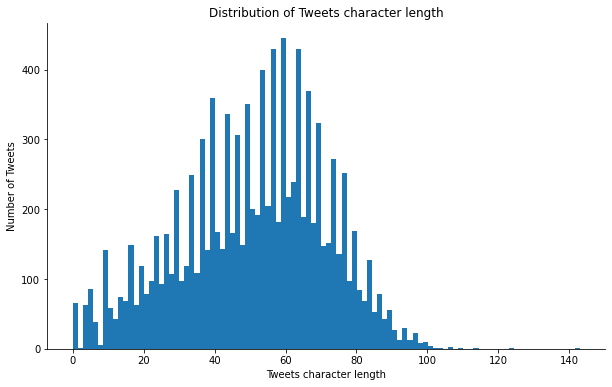

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in tweet]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Tweets character length')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweets character length')
sns.despine();

<font><b>Wordcloud:</b></font>

I use wordcloud to simply visualize the data and which words are shown in varying sizes depending on how often they appear in tweets.

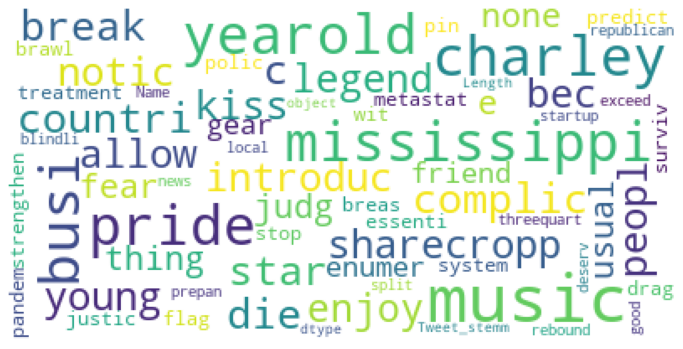

In [136]:
import matplotlib as mpl
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=40, 
                          random_state=1000
                         ).generate(str(tweet))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

<font><b>Unigrams:</b></font><p></p>
<font><b>CountVectorizer: Transforms text into a sparse matrix of n-gram counts.</b></font>

In [134]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(tweet, 10)
unigram = pd.DataFrame(common_words, columns = ['unigram' , 'count'])
unigram.head()

,unigram,count
0,sport,1904
1,music,1716
2,data,1559
3,scienc,1240
4,covid,1198


<font size='4px' color='#857D3D'><b>3.1. TF-IDF vectorize </b></font>

<font><b>TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document </b></font><p></p>
<font><b>The TF-IDF value increases in relation to the number of times a word appears in the document and is offset by the number of existing documents that contain the word. It’s often used in text-mining and information retrieval.</b></font>

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tweet)
tfidf.shape


print(tfidf)
print(tfidf_vectorizer.get_feature_names()) # rray mapping from feature integer indices to feature name

  (0, 207)	0.25841346110661295
  (0, 179)	0.40429356448306725
  (0, 251)	0.3785432240747187
  (0, 848)	0.4527886905638216
  (0, 584)	0.23071735360881618
  (0, 202)	0.34841021128109456
  (0, 680)	0.3479857698024217
  (0, 141)	0.3546016884828918
  (1, 88)	0.4593853047753014
  (1, 77)	0.47911252738130183
  (1, 109)	0.36948666853631035
  (1, 848)	0.372015229923922
  (1, 584)	0.18955943719209256
  (1, 202)	0.2862569396249292
  (1, 680)	0.2859082147173324
  (1, 141)	0.2913439125613053
  (2, 580)	0.383738242059689
  (2, 378)	0.27216655887414093
  (2, 30)	0.39821209061333623
  (2, 483)	0.4060104406343972
  (2, 997)	0.3866588943248706
  (2, 507)	0.29669555775357753
  (2, 460)	0.43515196079928614
  (2, 584)	0.16841138696081562
  (3, 475)	0.37147720709574045
  :	:
  (10760, 734)	0.5837264955045278
  (10760, 512)	0.5235256832484473
  (10760, 131)	0.6206321272905948
  (10761, 283)	0.5980317166178805
  (10761, 926)	0.6432067273029295
  (10761, 984)	0.4781664687860555
  (10762, 920)	0.549901781824134

<font size='4px' color='#857D3D'><b>3.2. CountVectorizer </b></font>

<font><b>the CountVectorizer class from the sklearn.feature_extraction.text module to create a document-term matrix to create vocabulary of all the words in my tweets data.</b></font>

In [132]:
from sklearn.feature_extraction.text import CountVectorizer
sample = tweet.tolist()[:5]
vectorizer =CountVectorizer(min_df=0., max_df=1.0, max_features=15)
data= vectorizer.fit_transform(sample)
print(pd.DataFrame(data.A, columns=vectorizer.get_feature_names()).to_string())


   allow  busi  charley  countri  enjoy  kiss  legend  mississippi  morn  music  none  notic  pietsch  pride  star
0      0     0        1        1      0     0       0            0     0      1     0      0        1      1     1
1      0     0        1        1      0     0       0            1     0      1     0      0        0      1     1
2      0     0        0        0      0     1       1            1     1      1     0      0        0      0     0
3      1     0        0        0      2     0       0            0     0      0     0      1        0      0     0
4      0     2        0        0      0     0       0            0     0      1     1      0        0      0     0


<font><b>Using elbow method to decide cluster number</b></font>

<font><b>In cluster analysis, the elbow used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.</b></font>

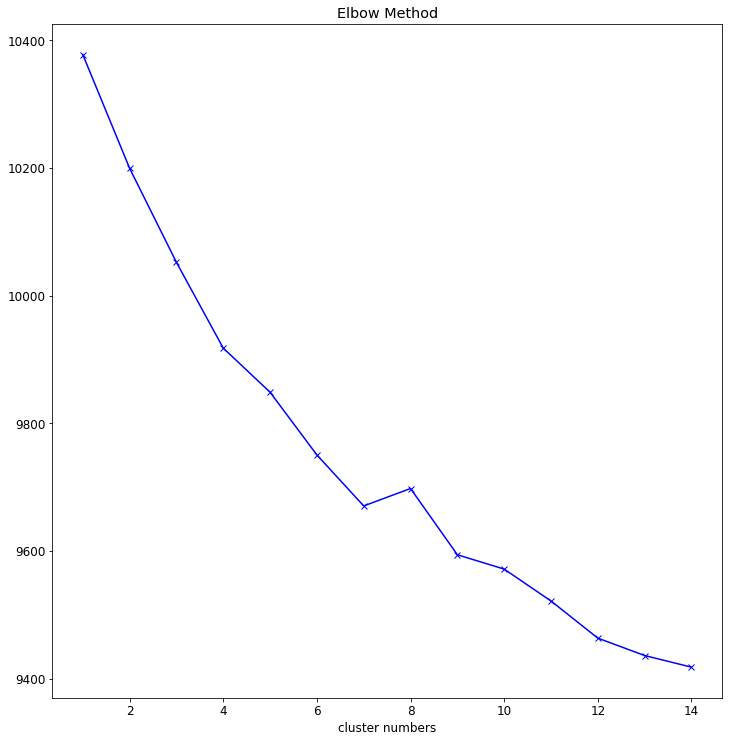

In [115]:
from sklearn.cluster import KMeans
K = range(1,15)
SSE = []
for k in K:
    km = KMeans(n_clusters = k)
    km.fit(tfidf)
    SSE.append(km.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(K,SSE,'bx-')
plt.title('Elbow Method')
plt.xlabel('cluster numbers')
plt.show()

<font><b>Using KMeans to cluster</b></font>

In [120]:
k = 5
km =KMeans (n_clusters = k)
km.fit(tfidf)
centers = km.cluster_centers_.argsort()[:,::-1]
terms =  tfidf_vectorizer.get_feature_names()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list) 

cluster0:
['covid', 'news', 'vaccin', 'like', 'say', 'time', 'politiqu', 'year', 'peopl', 'today', 'live', 'know', 'test', 'state', 'think']
cluster1:
['data', 'scienc', 'learn', 'android', 'uiux', 'python', 'datasci', 'machin', 'cours', 'machinelearn', 'use', 'open', 'comput', 'analyt', 'free']
cluster2:
['sport', 'footbal', 'play', 'watch', 'like', 'good', 'love', 'women', 'game', 'team', 'extrem', 'olymp', 'peopl', 'best', 'time']
cluster3:
['pride', 'charley', 'countri', 'die', 'complic', 'covid', 'music', 'legend', 'black', 'superstar', 'dead', 'star', 'dalla', 'stone', 'roll']
cluster4:
['music', 'award', 'fact', 'listen', 'video', 'like', 'year', 'love', 'artist', 'play', 'congratul', 'appl', 'win', 'make', 'good']
